In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions

In [158]:
X , Y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=['col1','col2','col3','col4'])
df['target'] = Y

In [160]:
class myAdaBoost():
    def calculate_weights(self, df):
        df['weights'] = 1 / df.shape[0]
        return df
        
    def decision_stump(self, df):
        X = df.iloc[:,0:4].values
        Y = df.iloc[:,4].values

        dt = DecisionTreeClassifier(max_depth=1)
        dt.fit(X, Y)
        plot_tree(dt)

        return dt

    def calculate_predictions(self, df, dt):
        X = df.iloc[:,0:4].values
        df['y_pred'] = dt.predict(X)

        return df

    def calculate_model_weights(self, df):
        error = 0
        for index,row in df.iterrows():
            if row['target'] != row['y_pred']:
                error = error + row['weights']

        result = 0.5 * np.log((1-error)/(error+0.0000001))
        return result

    def update_row_weight(self,row, alpha=alpha1):
        if row['target'] == row['y_pred']:
            return row['weights'] * np.exp(-alpha1)
        else:
            return row['weights'] * np.exp(alpha1)

    def normalize_weights(self, df):
        df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()
        print(df['normalized_weights'].sum())
        return df

    def creat_upper_lower_ranges(self, df):
        df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
        df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
        return df

    def create_new_dataset(self, df):
        indices = []
        for i in range(df.shape[0]):
            a = np.random.random()
            for index, row in df.iterrows():
                if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                    indices.append(index)
        index_values = indices
        second_df = df.iloc[index_values, [0,1,2,3,4,5]]
        return second_df

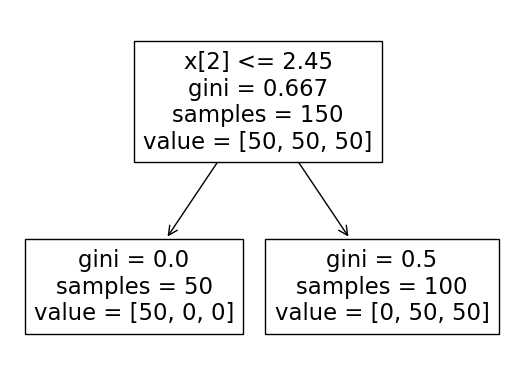

In [182]:
obj = myAdaBoost()
df = obj.calculate_weights(df)
dt = obj.decision_stump(df)
df = obj.calculate_predictions(df, dt)
alpha1 = obj.calculate_model_weights(df)

In [184]:
df['updated_weights'] = df.apply(obj.update_row_weight, axis=1)
df['updated_weights'].sum()

0.942809041582074

In [186]:
df = obj.normalize_weights(df)

1.0


In [188]:
df = obj.creat_upper_lower_ranges(df)
df

,col1,col2,col3,col4,target,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,5.1,3.5,1.4,0.2,0,0.006667,0,0.004714,0.005,0.005,0.000
1,4.9,3.0,1.4,0.2,0,0.006667,0,0.004714,0.005,0.010,0.005
2,4.7,3.2,1.3,0.2,0,0.006667,0,0.004714,0.005,0.015,0.010
3,4.6,3.1,1.5,0.2,0,0.006667,0,0.004714,0.005,0.020,0.015
4,5.0,3.6,1.4,0.2,0,0.006667,0,0.004714,0.005,0.025,0.020
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.006667,1,0.009428,0.010,0.960,0.950
146,6.3,2.5,5.0,1.9,2,0.006667,1,0.009428,0.010,0.970,0.960
147,6.5,3.0,5.2,2.0,2,0.006667,1,0.009428,0.010,0.980,0.970
148,6.2,3.4,5.4,2.3,2,0.006667,1,0.009428,0.010,0.990,0.980


In [190]:
second_df = obj.create_new_dataset(df)

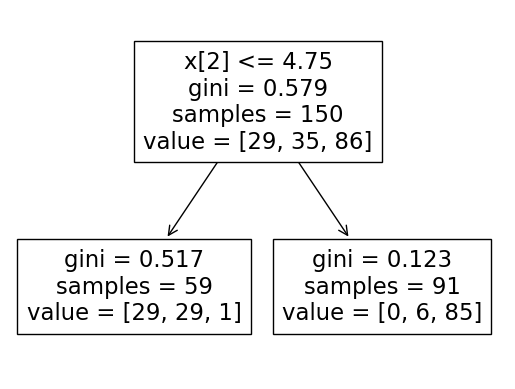

In [192]:
dt2 = obj.decision_stump(second_df)

In [194]:
second_df = obj.calculate_predictions(second_df, dt2)

In [196]:
alpha2 = obj.calculate_model_weights(second_df)
alpha2

0.5763395466359034

In [198]:
second_df['updated_weights'] = second_df.apply(obj.update_row_weight, axis=1)
second_df['updated_weights'].sum()

0.8768124383698093

In [200]:
second_df = obj.normalize_weights(second_df)

0.9999999999999999


In [202]:
second_df = obj.creat_upper_lower_ranges(second_df)

In [204]:
third_df = obj.create_new_dataset(second_df)

0.9999999999999999


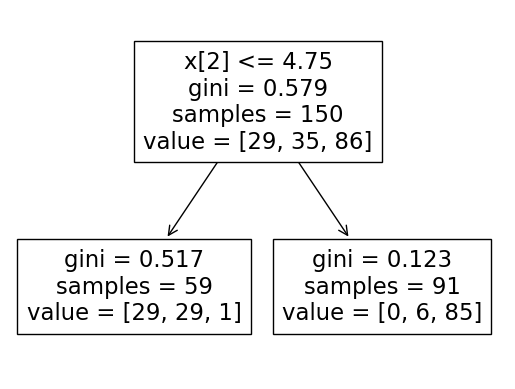

In [209]:
dt3 = obj.decision_stump(second_df)
third_df = obj.calculate_predictions(second_df, dt3)
alpha3 = obj.calculate_model_weights(third_df)
third_df['updated_weights'] = third_df.apply(obj.update_row_weight, axis=1)
third_df['updated_weights'].sum()
third_df = obj.normalize_weights(third_df)
third_df = obj.creat_upper_lower_ranges(third_df)

In [211]:
print(alpha1, alpha2, alpha3)

0.3465734402799959 0.5763395466359034 0.5763395466359034


In [215]:
# Predictions
# Predictions
query = np.array([5.7,2.8,4.5,1.3]).reshape(1,4)
dt.predict(query)

array([1])

In [217]:
dt2.predict(query)

array([0])

In [219]:
dt3.predict(query)

array([0])

In [221]:
alpha1*1 + alpha2*(0) + alpha3*(0)

0.3465734402799959

In [223]:
np.sign(0.34)

1.0